In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 
load diabetes_data

In [159]:
df = pd.read_csv("diabetes_data.csv")

for i in df.columns[:-1]:
    df[i]=(df[i]-df[i].mean())/df[i].std()


print(df.head())
df1 = df[['Glucose','BloodPressure',"SkinThickness",'Outcome']]


df1.head()

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1    -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2     1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3    -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4    -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468187  1.425067        1  
1                 -0.364823 -0.190548        0  
2                  0.604004 -0.105515        1  
3                 -0.920163 -1.040871        0  
4                  5.481337 -0.020483        1  


,Glucose,BloodPressure,SkinThickness,Outcome
0,0.847771,0.149543,0.906679,1
1,-1.122665,-0.160441,0.530556,0
2,1.942458,-0.263769,-1.287373,1
3,-0.997558,-0.160441,0.154433,0
4,0.503727,-1.503707,0.906679,1


## Divide the dataset into train and test datasets

In [160]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest= tts(df1[df1.columns.difference(["Outcome"])],df1['Outcome'],test_size=0.25,random_state=40)


## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [161]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
print(sigmoid(xtrain.loc[1]))


BloodPressure    0.459976
Glucose          0.245517
SkinThickness    0.629613
Name: 1, dtype: float64


In [162]:
xtrain["for_intercept"]=1
xtrain=xtrain[["for_intercept"]+list(xtrain.columns[:-1])]
xtrain
def logistic_func(beta,X):
    return 1/(1+np.exp(np.dot(np.array(beta),-X.T)))
    
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """
xtrain

,for_intercept,BloodPressure,Glucose,SkinThickness
563,1,-0.470426,-0.684790,-0.096316
739,1,0.252871,-0.590960,-1.287373
554,1,-0.263769,-1.153942,0.154433
720,1,0.872840,-1.185218,-0.096316
652,1,0.252871,0.065852,1.220115
...,...,...,...,...
440,1,1.802794,2.130119,0.279807
165,1,0.252871,-0.528406,-0.159003
7,1,-3.570271,-0.184362,-1.287373
219,1,-0.160441,-0.278192,-1.287373


In [163]:
def gradient(beta, X, Y):
    return np.dot((logistic_func(beta,X) -Y).T,X)
    
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
gradient([1,2,3], xtrain, ytrain)


ValueError: shapes (3,) and (4,576) not aligned: 3 (dim 0) != 4 (dim 0)

In [164]:
def cost_func(X, Y, beta):
    cost=0
    for i in range(X.shape[0]):
        cost+=-Y.iloc[i]*np.log(logistic_func(X.iloc[i],beta))-(1-Y.iloc[i])*np.log(1-logistic_func(X.iloc[i],beta))
    return cost/X.shape[0]


    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    """
    
    
cost_func(xtrain,ytrain,np.array([1,2,3,4]))

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

In [143]:
def gradient_descent(X, Y, epsilon=1e-6, step_size=1e-4, max_steps=580):
    n=X.shape[0]
    m=X.shape[1]
    beta=np.zeros(m)
    for i in range(max_steps):
        beta = beta - step_size*gradient(beta, X[X.columns], Y)
        

    return beta
    
    
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """

xtrain["for_intercept"]=1
gradient_descent(xtrain, ytrain, epsilon=1e-6, step_size=1e-4) 

array([-0.79882548, -0.03102173,  1.15328232])

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [144]:
beta=gradient_descent(xtrain, ytrain, epsilon=1e-6, step_size=1e-4)
print(beta)
xtest["for_intercept"]=1
xtest=xtest[["for_intercept"]+list(xtest.columns[:-1])]

print(np.where(logistic_func(beta,xtest)>0.5,1,0))

[-0.79882548 -0.03102173  1.15328232]
[1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 1]


## Use the logistic regression available in Sklearn on the same data.

In [145]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest= tts(df1[df1.columns.difference(["Outcome"])],df1['Outcome'],test_size=0.25,random_state=40)


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',fit_intercept=True)
logreg.fit(xtrain,ytrain)
pred = logreg.predict(xtest)
print(logreg.intercept_,logreg.coef_)
from sklearn.metrics import confusion_matrix as cm
from sklearn import metrics
cm = cm(ytest,pred)
print(cm)
print("Accuracy is %s" % round((cm[1][1]+cm[0][0])/(cm[1][1]+cm[0][0]+cm[1][0]+cm[1][1]),5))
print("Precision is %s" % round(cm[1][1]/(cm[1][1]+cm[0][1]),5))
print("Recall is %s" % round(cm[1][1]/(cm[1][1]+cm[1][0]),5))


[-0.79760138] [[-0.03438532  1.15500417]]
[[110   9]
 [ 37  36]]
Accuracy is 0.66667
Precision is 0.8
Recall is 0.49315


## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

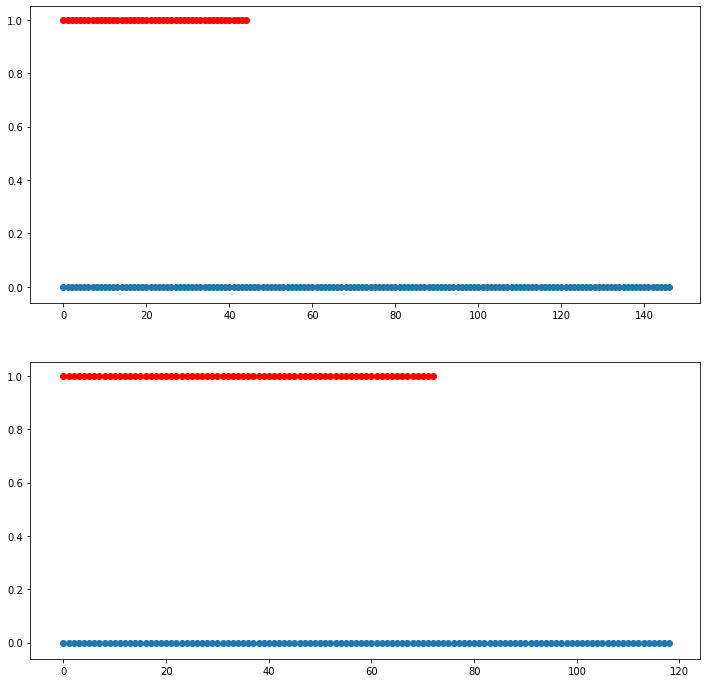

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [158]:
fig , axis = plt.subplots(2,1,figsize=(12,12))
axis[0].scatter(np.arange(len(pred[pred==0])),pred[pred==0])
axis[0].scatter(np.arange(len(pred[pred==1])),pred[pred==1],color="r")


axis[1].scatter(np.arange(len(ytest[ytest==0])),ytest[ytest==0])
axis[1].scatter(np.arange(len(ytest[ytest==1])),ytest[ytest==1],color="r")
plt.show()
np.arange(len(pred[pred==1]))